In [1]:
%matplotlib inline

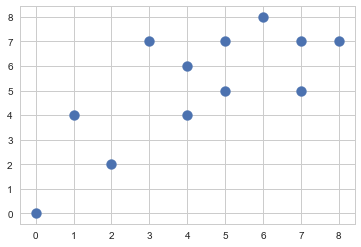

In [2]:
X = np.array([[7, 5], [5, 7], [7, 7], [4, 4], [4, 6], [1, 4],
              [0, 0], [2, 2], [8, 7], [6, 8], [5, 5], [3, 7]])

plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

### 랜덤으로 두개 선택 K = 2

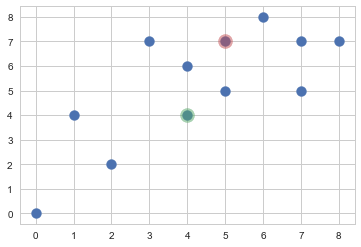

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=100)

plt.scatter(5, 7, s=200, c="r", alpha=0.5)
plt.scatter(4, 4, s=200, c="g", alpha=0.5)
 
plt.show()

In [4]:
kcen = np.array([[5, 7], [4,4]])

In [5]:
rows = []
for k in range(2):
    row = []
    for i in range(len(X)):
        dist = np.linalg.norm(X[i] - kcen[k])**2
        row.append(dist)
    rows.append(row)
    
res = pd.DataFrame(rows).T
ksel = []

for i in range(len(res)):
    ksel.append( res.loc[i].idxmin())

res = pd.concat([res, pd.Series(ksel, name=3)],axis=1)

In [6]:
res

,0,1,3
0,8.0,10.0,0
1,0.0,10.0,0
2,4.0,18.0,0
3,10.0,0.0,1
4,2.0,4.0,0
5,25.0,9.0,1
6,74.0,32.0,1
7,34.0,8.0,1
8,9.0,25.0,0
9,2.0,20.0,0


In [7]:
res[res[3]==0][0].sum() + res[res[3]==1][1].sum()

80.0

### 새로운 centroid 구하기

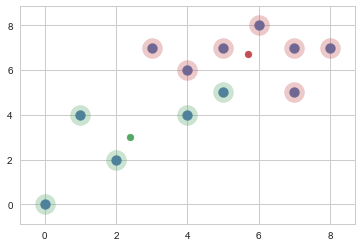

In [8]:
k0 = X[res[res[3] == 0].index]
k1 = X[res[res[3] == 1].index]

plt.scatter(X[:, 0], X[:, 1], s=100)

#plt.scatter(5, 7, s=200, c="r", alpha=0.5)
#plt.scatter(4, 4, s=200, c="g", alpha=0.5)

plt.scatter( k0[:,0], k0[:,1], c="r", alpha=0.3, s=400)
plt.scatter( k1[:,0], k1[:,1], c="g", alpha=0.3, s=400)

plt.scatter( np.mean(k0[:,0]), np.mean( k0[:,1]), c='r')
plt.scatter( np.mean(k1[:,0]), np.mean( k1[:,1]), c='g')
plt.show()

In [9]:
np.mean(k0[:,0]), np.mean( k0[:,1])

(5.714285714285714, 6.714285714285714)

In [10]:
np.mean(k1[:,0]), np.mean( k1[:,1])

(2.4, 3.0)

In [11]:
kcen = np.array([[5.714285, 6.7142857], [2.4, 3]])

In [12]:
rows = []
for k in range(2):
    row = []
    for i in range(len(X)):
        dist = np.linalg.norm(X[i] - kcen[k])**2
        row.append(dist)
    rows.append(row)
    
res = pd.DataFrame(rows).T
ksel = []

for i in range(len(res)):
    ksel.append( res.loc[i].idxmin())

res = pd.concat([res, pd.Series(ksel, name=3)],axis=1)

In [13]:
res

,0,1,3
0,4.591839,25.16,0
1,0.591836,22.76,0
2,1.734696,37.16,0
3,10.306120,3.56,1
4,3.448977,11.56,0
5,29.591830,2.96,1
6,77.734686,14.76,1
7,36.020403,1.16,1
8,5.306126,47.36,0
9,1.734694,37.96,0


In [14]:
res[res[3]==0][0].sum() + res[res[3]==1][1].sum()

50.74612137959592

### 한번더 갱신

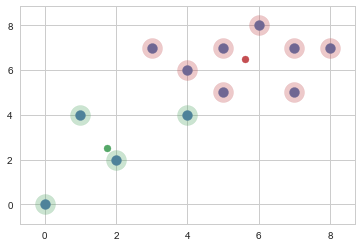

In [15]:
k0 = X[res[res[3] == 0].index]
k1 = X[res[res[3] == 1].index]

plt.scatter(X[:, 0], X[:, 1], s=100)

plt.scatter( k0[:,0], k0[:,1], c="r", alpha=0.3, s=400)
plt.scatter( k1[:,0], k1[:,1], c="g", alpha=0.3, s=400)

plt.scatter( np.mean(k0[:,0]), np.mean( k0[:,1]), c='r')
plt.scatter( np.mean(k1[:,0]), np.mean( k1[:,1]), c='g')
plt.show()

In [16]:
np.mean(k0[:,0]), np.mean( k0[:,1])

(5.625, 6.5)

In [17]:
np.mean(k1[:,0]), np.mean( k1[:,1])

(1.75, 2.5)

In [18]:
kcen = np.array([[5.625, 6.5], [1.75, 2.5]])

In [19]:
rows = []
for k in range(2):
    row = []
    for i in range(len(X)):
        dist = np.linalg.norm(X[i] - kcen[k])**2
        row.append(dist)
    rows.append(row)
    
res = pd.DataFrame(rows).T
ksel = []

for i in range(len(res)):
    ksel.append( res.loc[i].idxmin())

res = pd.concat([res, pd.Series(ksel, name=3)],axis=1)

In [20]:
res

,0,1,3
0,4.140625,33.8125,0
1,0.640625,30.8125,0
2,2.140625,47.8125,0
3,8.890625,7.3125,1
4,2.890625,17.3125,0
5,27.640625,2.8125,1
6,73.890625,9.3125,1
7,33.390625,0.3125,1
8,5.890625,59.3125,0
9,2.390625,48.3125,0


In [21]:
res[res[3]==0][0].sum() + res[res[3]==1][1].sum()

47.625

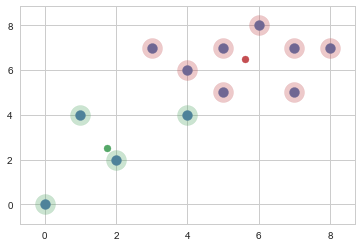

In [22]:
k0 = X[res[res[3] == 0].index]
k1 = X[res[res[3] == 1].index]

plt.scatter(X[:, 0], X[:, 1], s=100)

plt.scatter( k0[:,0], k0[:,1], c="r", alpha=0.3, s=400)
plt.scatter( k1[:,0], k1[:,1], c="g", alpha=0.3, s=400)

plt.scatter( np.mean(k0[:,0]), np.mean( k0[:,1]), c='r')
plt.scatter( np.mean(k1[:,0]), np.mean( k1[:,1]), c='g')
plt.show()

In [23]:
np.mean(k0[:,0]), np.mean( k0[:,1])

(5.625, 6.5)

In [24]:
np.mean(k1[:,0]), np.mean( k1[:,1])

(1.75, 2.5)

### k-manes ++

1. 랜덤하게 x를 선택하여 centroid로 지정 집합 m에 저장한다
2. 2 ~ k 개의 centrioid 구할차례
3. $ \dfrac{ d(x, u)}{ \sum d({x, u})}$ 를 이용하여 각 확률을 부여한다.
    - d(x, u)는 각 centroid와의 거리의 최소값이다.

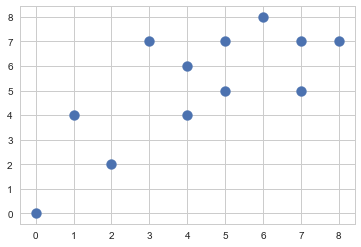

In [25]:
X = np.array([[7, 5], [5, 7], [7, 7], [4, 4], [4, 6], [1, 4],
              [0, 0], [2, 2], [8, 7], [6, 8], [5, 5], [3, 7]])

plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

### 맨처음은 랜덤으로 아무거나 선택

In [26]:
M = np.array([[7,5]])

In [27]:
sumd = 0
row = []
for i in X:
    d = np.linalg.norm(i - M[0])**2
    sumd += d
    row.append([i, d])

df = pd.DataFrame(row)
df['r1'] = df[1] / sumd

In [28]:
df

,0,1,r1
0,"[7, 5]",0.0,0.000000
1,"[5, 7]",8.0,0.037037
2,"[7, 7]",4.0,0.018519
3,"[4, 4]",10.0,0.046296
4,"[4, 6]",10.0,0.046296
5,"[1, 4]",37.0,0.171296
6,"[0, 0]",74.0,0.342593
7,"[2, 2]",34.0,0.157407
8,"[8, 7]",5.0,0.023148
9,"[6, 8]",10.0,0.046296


In [29]:
for _ in range(5):
    idx = np.random.choice(range(12), 1, p=df['r1'])
    print(idx)

[11]
[6]
[11]
[6]
[7]


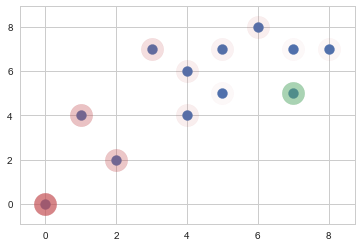

In [30]:
X = np.array([[7, 5], [5, 7], [7, 7], [4, 4], [4, 6], [1, 4],
              [0, 0], [2, 2], [8, 7], [6, 8], [5, 5], [3, 7]])

plt.scatter(X[:, 0], X[:, 1], s=100)

plt.scatter(x=7, y=5, s=500, c='g', alpha=0.5)

for i in range(len(df)):

    x = df.iloc[i][0][0]
    y = df.iloc[i][0][1]
    prob = df.iloc[i]['r1'] *2
    
    plt.scatter(x, y, s=500, c='r', alpha=prob)

plt.show()

In [31]:
M = np.array([[7,5], [0, 0]])

In [32]:
sumd = 0
row = []


for i in X:
    d_res = [] 
    for m in M: 
        
        # 길이 구하기
        d = np.linalg.norm(i - m)**2
        d_res.append(d)
    
    # 가장 작은 길이를 기준으로 계산한다.
    d_min = np.min(d_res) 

    sumd += d_min
    row.append([i, d_min])
    
df = pd.DataFrame(row)
df['r1'] = df[1] / sumd 
df

,0,1,r1
0,"[7, 5]",0.0,0.000000
1,"[5, 7]",8.0,0.083333
2,"[7, 7]",4.0,0.041667
3,"[4, 4]",10.0,0.104167
4,"[4, 6]",10.0,0.104167
5,"[1, 4]",17.0,0.177083
6,"[0, 0]",0.0,0.000000
7,"[2, 2]",8.0,0.083333
8,"[8, 7]",5.0,0.052083
9,"[6, 8]",10.0,0.104167


In [33]:
for _ in range(5):
    idx = np.random.choice(range(12), 1, p=df['r1'])
    print(idx)

[11]
[11]
[11]
[5]
[11]


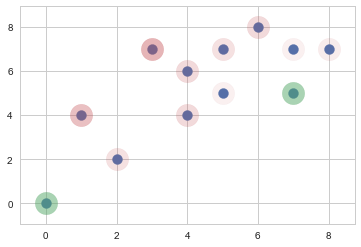

In [207]:
X = np.array([[7, 5], [5, 7], [7, 7], [4, 4], [4, 6], [1, 4],
              [0, 0], [2, 2], [8, 7], [6, 8], [5, 5], [3, 7]])

plt.scatter(X[:, 0], X[:, 1], s=100)

plt.scatter(x=7, y=5, s=500, c='g', alpha=0.5)
plt.scatter(x=0, y=0, s=500, c='g', alpha=0.5)

for i in range(len(df)):

    x = df.iloc[i][0][0]
    y = df.iloc[i][0][1]
    prob = df.iloc[i]['r1'] * 2
    
    plt.scatter(x, y, s=500, c='r', alpha=prob)

plt.show()

In [208]:
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)

x : (12, 2)


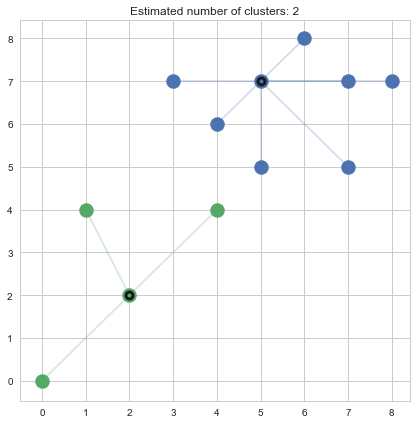

In [209]:
from itertools import cycle
plt.figure(figsize=(7,7)) 
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

#plt.scatter(X[:, 0], X[:, 1], s=300, alpha=0.3)
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    #plt.plot(X[class_members, 0], X[class_members, 1], col + '.',)
    plt.scatter(X[class_members, 0], X[class_members, 1], c=col, s=200)
    
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.25)
    plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, markersize=7) 
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [221]:
matrix = []
for x1 in X:
    row = []
    for x2 in X:
        s = -np.linalg.norm(x1 - x2)**2
        row.append(s)
    matrix.append(row)
    
sdf = pd.DataFrame(matrix,
                   index=[str(x) for x in X],
                   columns=[str(x) for x in X])

In [222]:
S = sdf.values.copy()
n_samples = S.shape[0]
S = sdf.values.copy()
A = np.zeros((n_samples, n_samples))
R = np.zeros((n_samples, n_samples)) 
E = np.zeros((n_samples, n_samples)) 

In [223]:
med = np.median(S)
S.flat[::(n_samples)+1] = med
np.trace(S), med * n_samples

(-120.00000000000001, -120.00000000000003)

In [224]:
N = len(S)
lam = 0.7
max_iter = 200
for m in range(max_iter):
    for i in range(N):
        for k in range(N):
            tmax = -1e100
            for kk in range(k): 
                uv = S[i, kk] + A[i, kk]
                if uv > tmax:
                    tmax = uv

            for kk in range(k+1, N):
                uv = S[i, kk] + A[i, kk]
                if uv > tmax:
                    tmax = uv

            R[i, k] = (1-lam) * S[i, k] - tmax + lam * R[i, k]


    for i in range(N): 
        for k in range(N):
            if i == k:
                tsum = 0

                for ii in range(i):
                    tsum += np.maximum(0.0, R[ii, k])

                for ii in range(i+1, N): 
                    tsum += np.maximum(0.0, R[ii, k])

                A[i, k] = (1-lam) * tsum + lam * A[i, k]
            else:
                tsum = 0
                maxik = np.maximum(i, k)
                minik = np.minimum(i, k) 
                
                for ii in range(minik):
                    tsum += np.maximum(0.0, R[ii, k])
                    
                for ii in range(minik + 1, maxik):
                    tsum += np.maximum(0.0, R[ii, k])
                    
                for ii in range(maxik + 1, N):
                    tsum += np.maximum(0.0, R[ii, k])
                
                
                A[i, k] = (1-lam) * np.minimum(0, R[k,k] + tsum) + lam * A[i,k]
        

center = []
for i in range(N):
    E[i, i] = R[i,i] + A[i, i] 
    if E[i,i] > 0:
        center.append(i)

idx = np.zeros(N)
for i in range(N):
    idxForI = 0
    maxSim = -1e100
    
    for j in range(len(center)):
        
        c = center[j]
        if S[i, c] > maxSim:
            maxSim = S[i, c]
            idxForI = c
    
    idx[i] = idxForI

    
for i in range(N):
    print(idx[i] + 1)

3.0
5.0
9.0
11.0
2.0
8.0
8.0
6.0
3.0
2.0
5.0
5.0


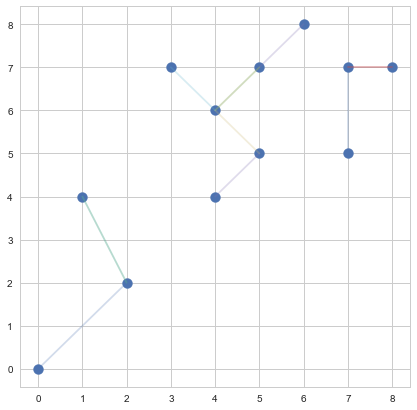

In [225]:
plt.figure(figsize=(7,7)) 
plt.scatter(X[:, 0], X[:, 1], s=100)


for i, p in enumerate(X):
    x1 = p[0]
    y1 = p[1] 
    x2 = X[int(idx[i])][0]
    y2 = X[int(idx[i])][1]

    
    plt.plot([x2, x1], [y2, y1],  alpha=0.25)

plt.show()

In [171]:
X = np.array([
[-2.341500, 3.696800],
[-1.109200, 3.111700],
[-1.566900, 1.835100],
[-2.658500, 0.664900],
[-4.031700, 2.845700],
[-3.081000, 2.101100],
[2.588000, 1.781900],
[3.292300, 3.058500],
[4.031700, 1.622300],
[3.081000, -0.611700],
[0.264100, 0.398900],
[1.320400, 2.207400],
[0.193700, 3.643600],
[1.954200, -0.505300],
[1.637300, 1.409600],
[-0.123200, -1.516000],
[-1.355600, -3.058500],
[0.017600, -4.016000],
[1.003500, -3.590400],
[0.017600, -2.420200],
[-1.531700, -0.930900],
[-1.144400, 0.505300],
[0.616200, -1.516000],
[1.707700, -2.207400],
[2.095100, 3.430900]])

x : (25, 2)


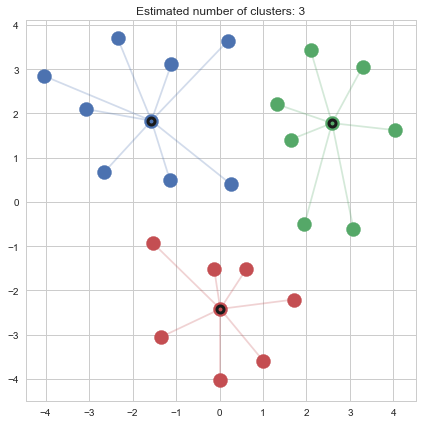

In [183]:
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)

from itertools import cycle
plt.figure(figsize=(7,7)) 
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

#plt.scatter(X[:, 0], X[:, 1], s=300, alpha=0.3)
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    #plt.plot(X[class_members, 0], X[class_members, 1], col + '.',)
    plt.scatter(X[class_members, 0], X[class_members, 1], c=col, s=200)
    
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.25)
    plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, markersize=7) 
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [170]:
from sklearn.metrics import silhouette_score

In [164]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score

|   |Y_1|Y_2|Y_3|Row sums|
|---|---|---|---|---|
|X_1| 3 | 0 | 1 | 4 |
|X_2| 1 | 2 | 1 | 4 |
|X_3| 0 | 2 | 2 | 4 | 
|Column sums | 4 | 4 | 4| 	

In [161]:
a1 = np.array([1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 2, 2])
a2 = np.array([3, 2, 3, 2, 2, 1, 1, 2, 3, 1, 3, 1])

In [162]:
adjusted_rand_score(a1, a2)

0.08333333333333333

In [163]:
adjusted_mutual_info_score(a1, a2)

0.11575305380508193

In [165]:
homogeneity_score(a1, a2)

0.303605369642814

In [166]:
completeness_score(a1, a2)

0.303605369642814

In [167]:
v_measure_score(a1, a2)

0.303605369642814

In [173]:
def count(n):
    if n > 0:
        count(n-1)
    print(n)

In [174]:
count(5)

0
1
2
3
4
5
